In [215]:
import re

import pandas as pn

import matplotlib.pyplot as plt

%matplotlib inline

In [216]:
DATA_PATH = 'C:/Users/Data/names/'

In [478]:
def get_all_data_by_years(years_list, groub_by):
    names_by_year = {}
    cols = ['Name', 'Gender', 'Count']
    for year in years_list:
        names_by_year[year] = pd.read_csv(
            '{}yob{}.txt'.format(DATA_PATH, str(year)),
            names = cols
        )
    return pd.concat(names_by_year, names = ['Year', 'Pos'])\
            .groupby(groub_by)\
            .sum()

In [416]:
def plot_the_figure_by_data(years_list, query_names,  group_by, kind_of_figure='line', size=(15, 7)):
    get_all_data_by_years(years_list, group_by)\
    .query('Name == {}'.format(query_names))\
    .unstack('Name')\
    .plot(
            kind = kind_of_figure,
            figsize = size,
            grid = True,
            rot = 50,
            y='Count'
        )

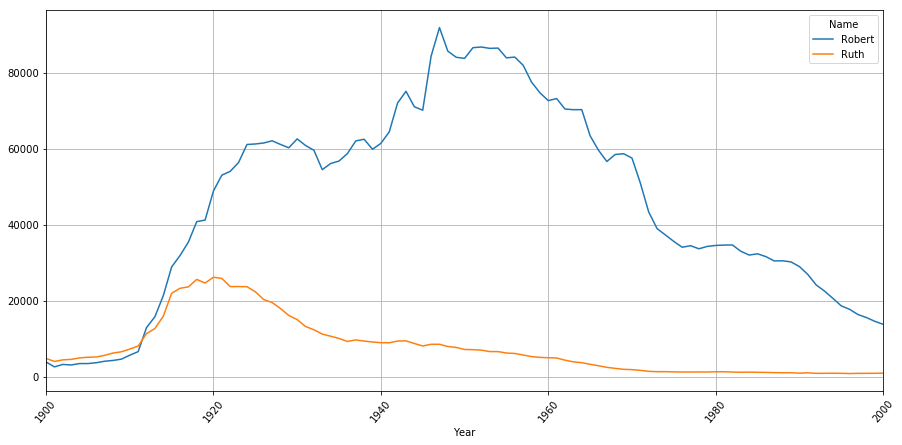

In [417]:
plot_the_figure_by_data(range(1900, 2001), ['Ruth', 'Robert'], ['Year', 'Name'])

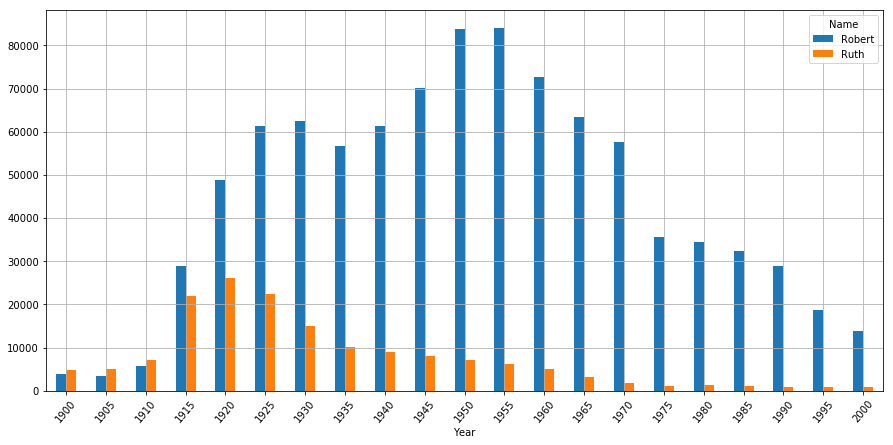

In [418]:
plot_the_figure_by_data(range(1900, 2001, 5), ['Ruth', 'Robert'], ['Year', 'Name'], 'bar')

In [419]:
def get_top_names_for_period(years_list, first_letter='', top_value=None):
    names = get_all_data_by_years(years_list, ['Name'])
    names_starts_with_the_letter = [name for name in names.to_dict()['Count'] if re.search('^{}'.format(first_letter), name)]
    count_names = names\
            .query('Name == {}'.format(names_starts_with_the_letter))\
            .sort_values(
                by='Count',
                ascending=False
            )\
            .head(top_value).to_dict()
    return [name for name in count_names['Count']]

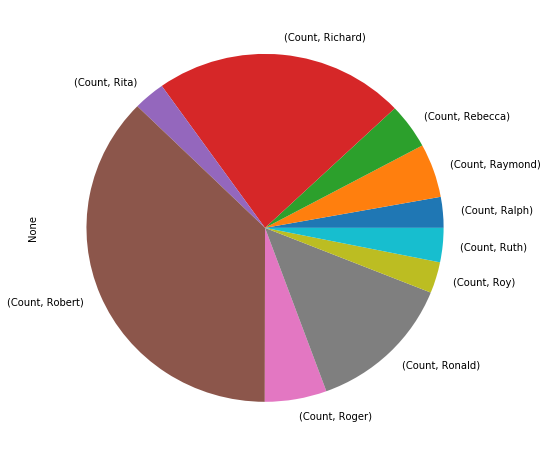

In [420]:
years_list = [1950]
plot_the_figure_by_data(
    years_list,
    get_top_names_for_period(years_list, 'R', 10), 
    ['Name'], 
    'pie', 
    (8,8))

In [499]:
years_list = list(range(1900, 2001))
vowels = set("aeiouy")
# get_all_data_by_years(years_list, ['Name'])
# names = pd.read_csv('{}yob2000.txt'.format(DATA_PATH),names=['Name', 'Gender', 'Count'])
# names.to_dict()
# names['Number_of_consonants'] = names.apply(lambda row: sum(1 for letter in row.N.lower() if letter not in vowels), axis=1)
# names.head(10)

def get_list_with_files_data(years_list):
    cols = ['Name', 'Gender', 'Count']
    list_names = [pd.read_csv(
            '{}yob{}.txt'.format(DATA_PATH, str(year)), names = cols) for year in years_list ]
    list_names.apply
get_list_with_files_data(years_list)

[            Name Gender  Count
 0           Mary      F  16706
 1          Helen      F   6343
 2           Anna      F   6114
 3       Margaret      F   5304
 4           Ruth      F   4765
 5      Elizabeth      F   4096
 6       Florence      F   3920
 7          Ethel      F   3896
 8          Marie      F   3856
 9        Lillian      F   3414
 10         Annie      F   3324
 11          Edna      F   3102
 12          Emma      F   3095
 13         Alice      F   3059
 14        Bessie      F   3044
 15        Bertha      F   3019
 16         Grace      F   2942
 17          Rose      F   2845
 18         Clara      F   2826
 19       Mildred      F   2800
 20        Gladys      F   2733
 21        Minnie      F   2673
 22      Gertrude      F   2580
 23         Pearl      F   2512
 24         Mabel      F   2509
 25       Frances      F   2495
 26       Dorothy      F   2491
 27        Martha      F   2437
 28         Hazel      F   2425
 29           Ida      F   2285
 ...    